In [1]:
import pandas as pd
import matplotlib.pyplot as plt

URL = 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469'

df = pd.read_csv(URL)

In [2]:
# Preliminary Checks

print(df.head())

print(df.info())

    code  start.date    end.date  number name  ss track rf.max
0  Y1852  1852-10-07  1852-10-08       5  NaN   2     O     F1
1  Y1857  1857-09-28  1857-09-28       4  NaN   2     N     F1
2  Y1861  1861-08-17  1861-08-17       2  NaN   1     O     Nd
3  Y1864  1864-08-31  1864-08-31       3  NaN   1     S     F1
4  Y1865  1865-09-11  1865-09-11       4  NaN   2     O     F1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB
None


In [3]:
# a.
# Step by step instructions on how to answer question: How many hurricanes with Saffir Simpson category 5 have been registered and what was their duration?

## 4. Data wrangling
Time to implement the plan! Clean the data!

In [4]:
# First filter down to category 5 hurricanes
df = df[df['ss'] == 5]

df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [5]:
df.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [6]:
df['start.date'] = df['start.date'].astype('datetime64')

In [7]:
df['end.date'] = df['end.date'].astype('datetime64')

In [8]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [9]:
df['duration'] = df['end.date'] - df['start.date']

df.head()

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


# 5. Collect your code and explain your results

In [10]:
############ TWO WAYS TO FILTER DOWN THIS CODE, MINE IS COMMENTED, KAT'S IS CODE ##########################

# URL = 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469'

# df = pd.read_csv(URL, parse_dates = ['start.date', 'end.date'])

# df['duration'] = df['end.date'] - df['start.date'] 

# df = df[df['ss'] == 5]

# df.head()

(df.loc[df['ss'] == 5]
 .assign(duration = pd.to_datetime(df['end.date']) - pd.to_datetime(df['start.date']))[['name', 'ss', 'duration']]
)


,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


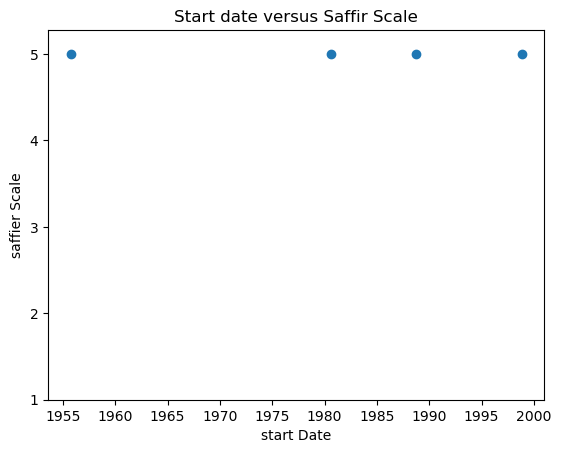

In [11]:
plt.figure()
plt.scatter(df['start.date'], df['ss'])
plt.title("Start date versus Saffir Scale")
plt.xlabel("start Date")
plt.ylabel("saffier Scale")

plt.yticks([1, 2, 3, 4, 5])
plt.show()